# Image Classification with CIFAR-10
This project trains a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into one of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. CIFAR-10 contains 60,000 32x32 color images, with 50,000 for training and 10,000 for testing.

## Step 1: Set Up Your Environment
Make sure you have:
*   Python 3.x installed
*   TensorFlow
*   NumPy
*   Matplotlib
*   scikit-learn





In [1]:
# Install necessary packages
%pip install tensorflow matplotlib numpy scikit-learn

## Step 2: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Step 3: Load the CIFAR-10 Dataset

In [3]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check what you loaded (optional)
print(x_train.shape) # (50000, 32, 32, 3)
print(y_train.shape) # (50000, 1)
print(x_test.shape) # (10000, 32, 32, 3)
print(y_test.shape) # (10000, 1)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Step 4: Preprocess the Data

In [4]:
# Normalize to 0-255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Make sure labels are 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Start a Sequential Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Setup early stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',   # Track validation accuracy
    patience=5,               # Stop if no improvement for 5 epochs
    restore_best_weights=True # Keep the best model
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3715 - loss: 1.7102 - val_accuracy: 0.5562 - val_loss: 1.2340
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5921 - loss: 1.1449 - val_accuracy: 0.6279 - val_loss: 1.0798
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6555 - loss: 0.9822 - val_accuracy: 0.6481 - val_loss: 1.0234
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6934 - loss: 0.8744 - val_accuracy: 0.6720 - val_loss: 0.9495
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7261 - loss: 0.7869 - val_accuracy: 0.6867 - val_loss: 0.9262
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7560 - loss: 0.6974 - val_accuracy: 0.6852 - val_loss: 0.9392
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7778 - loss: 0.6361 - val_accuracy: 0.6795 - val_loss: 0.9568
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8020 - loss: 0.5643 -

## Step 5: Visualize the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


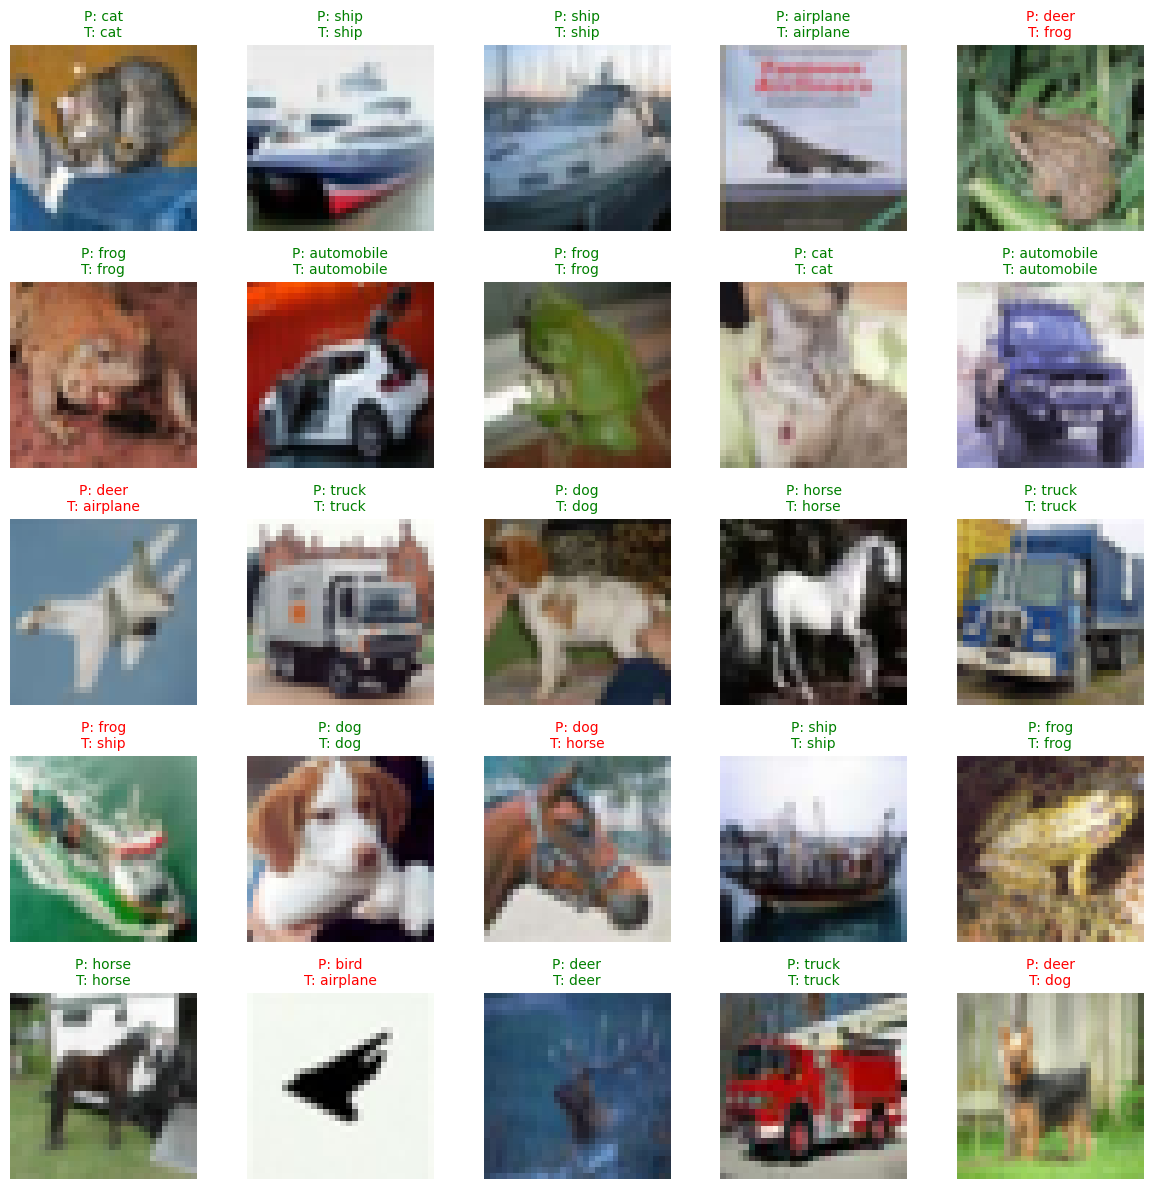

Correct predictions: 19/25
Accuracy on displayed images: 76.00%


In [8]:
# Number of images to display
num_images = 25
rows = 5
cols = 5
correct_count = 0 # Used to keep count of correct predictions

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.flatten() # Flatten to 1D array for easy indexing

predictions = model.predict(x_test) # Returns probabilities for each class
predicted_classes = np.argmax(predictions, axis=1) # Converts probabilities to class labels
true_classes = np.argmax(y_test, axis=1)

# Map Class Indices to Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize results
for i in range(num_images):
  ax = axes[i]
  ax.imshow(x_test[i])

  predicted_label = class_names[predicted_classes[i]]
  true_label = class_names[true_classes[i]]

  # Update correct_count if predicted_label equals true_label
  if predicted_label == true_label:
    correct_count += 1

  # Color code: green if correct, red if wrong
  color = 'green' if predicted_label == true_label else 'red'
  ax.set_title(f"P: {predicted_label}\nT: {true_label}", color=color, fontsize=10)

  ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Correct predictions: {correct_count}/{num_images}")
accuracy = correct_count / num_images * 100
print(f"Accuracy on displayed images: {accuracy:.2f}%")

## Step 6: Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6979 - loss: 0.9427
Test accuracy: 0.69


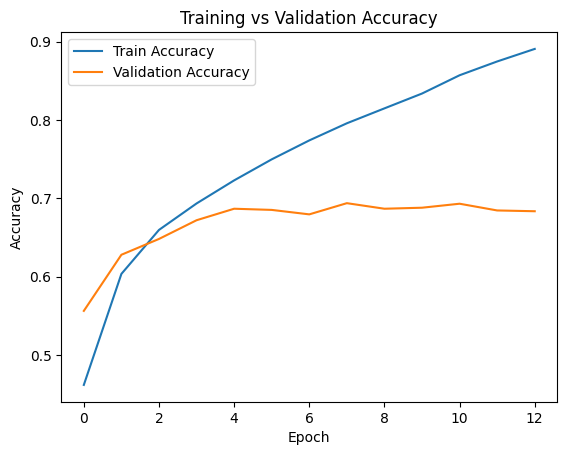

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

## Step 7: Save the Model

In [7]:
model.save('classification_model.keras')
print('Model saved successfuly!')

Model saved successfuly!
